In [1]:
## Regression is used to fit the daily increase in confirmed cases.
## We observe that a logistic function fits the data
## Note: this notebook uses the data from John Hopkins

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimization
from scipy.optimize import fsolve

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
corona_n = pd.read_csv(url,error_bad_lines = False)

In [4]:
corona_n.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,413,414,414,418,418,422,426,428,428,429
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,102,119,120,124,124,125


In [14]:
corona_keys = list(corona_n.keys())
corona_dates = corona_keys[4:]

In [19]:
corona_china = corona_n.loc[corona_n['Country/Region'] == 'Mainland China']

In [36]:
r_china=np.zeros(len(corona_dates))
for index, row in corona_china.iterrows():
    list_row = list(row)
    r_china+= np.array(list_row[4:])    

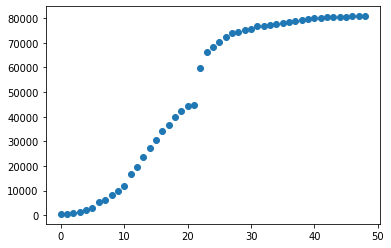

In [37]:
plt.plot(r_china,'o')

In [77]:
r_china.max()

80757.0

In [79]:

# normalise data to avoid numerical problems

xdata = np.arange(0,len(r_china));
ydata = r_china/r_china.max();
x0=np.array([1,10,20]);



def func(x, a, b,c):
    return a/(1+np.exp(-b*(x-c)))


In [84]:
c_result = optimization.curve_fit(func, xdata, ydata, x0)
print(c_result)

(array([ 0.99998452,  0.22260455, 17.74412513]), array([[ 5.96247761e-05, -3.07094043e-05,  7.99934646e-04],
       [-3.07094043e-05,  6.06961946e-05, -4.08521806e-04],
       [ 7.99934646e-04, -4.08521806e-04,  3.39970064e-02]]))


C:\Users\tgdej\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


In [82]:
xmax = len(r_china)-1
X0=np.linspace(0,xmax,num=100)
Y0=func(X0,c_result[0][0],c_result[0][1],c_result[0][2])

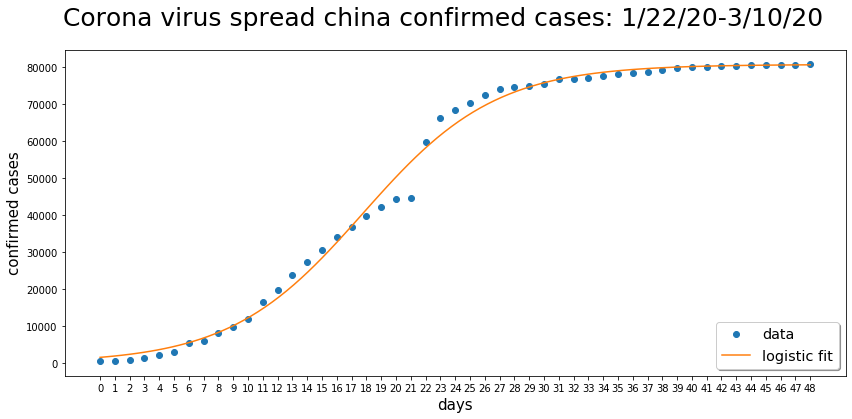

In [83]:
fig, ax = plt.subplots(figsize=(14, 6))
fig.suptitle('Corona virus china confirmed cases: '  + corona_dates[0] + '-' + corona_dates[-1],fontsize=25)
ax.plot(xdata, ydata*r_china.max(),'o',label='data')
ax.plot(X0,Y0*r_china.max(), label='logistic fit')
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.ylabel('confirmed cases',fontsize=15)
plt.xlabel('days',fontsize=15)
plt.xticks(np.arange(0, xmax+1, step=1))

#plt.savefig('corona_spread.jpg')
plt.show()